In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2: We will use the fashion-MNIST dataset for this question (you can download it from any other source also including libraries). Flatten and preprocess the data (if required) before starting the tasks. It will become a 784-dimensional data with 10 classes, more details are available in the link. ( 20 Marks )

## Read in the MNIST data

In [27]:
mnist_df= pd.read_csv('/home/section/Desktop/Files/MTECH IIT/Trimester 1/Machine Learning/Assignment/Data/fashion-mnist_test.csv')
mnist_df1= pd.read_csv('/home/section/Desktop/Files/MTECH IIT/Trimester 1/Machine Learning/Assignment/Data/fashion-mnist_train.csv')

In [28]:
mnist_df=pd.concat([mnist_df,mnist_df1],axis=0)

In [30]:
# print the top 5 values of the Dataframe
mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#drops the empty values
mnist_df.drop_duplicates(inplace=True)

#reset the index for the df and removes the index column so created
mnist_df.reset_index(inplace= True)
mnist_df.drop('index',axis=1,inplace=True)


In [32]:
# split the data in to X and y
X=mnist_df.drop('label',axis=1)
y=mnist_df.label

In [33]:
#print X
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69943,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
69944,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
69945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# print y
y

0        0
1        1
2        2
3        2
4        3
        ..
69942    9
69943    1
69944    8
69945    8
69946    7
Name: label, Length: 69947, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
29609,0,0,0,0,0,0,0,0,0,0,...,14,2,0,0,24,18,12,0,0,0
50133,0,0,0,0,0,2,2,0,0,0,...,177,162,85,0,0,0,0,0,0,0
50432,0,0,0,0,0,0,0,0,1,0,...,26,0,0,2,0,0,0,0,0,0
62879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## a)​ Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.

In [14]:
# Importing the standard scalar to scale the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [15]:
# Scales the X_train
X_scaled=scalar.fit_transform(X_train)

X_total_scaled=scalar.fit_transform(X)

In [16]:
#Choosing 10 random values for training.

np.random.seed(42)
random_rows=X_scaled[np.random.choice(X_scaled.shape[0],10,replace=False)]

In [ ]:
#import the Kmeans
from sklearn.cluster import KMeans

#initialise the KMeans Class

np.random.seed(42)

# Generate 10 random 784-dimensional points in the input range [0, 1]
initial_centroids = np.random.rand(10, 784)

# Train K-Means with k=10 and custom initial centroids
kmean1 = KMeans(n_clusters=10, init=initial_centroids, n_init=1, max_iter=300, random_state=42)
# kmeans.fit(x_train_flat)

# kmean1=KMeans(n_clusters=10,init='k-means++')
# init_centers = np.random.rand(10, 784)
# kmean1=KMeans(n_clusters=10, n_init=1, random_state=42)

In [42]:
#Fit on random rows.
kmean1.fit(X_total_scaled)

KMeans(init=array([[0.00933035, 0.71106381, 0.48498974, ..., 0.37496047, 0.28443927,
        0.9191027 ],
       [0.12702357, 0.43203079, 0.76698363, ..., 0.60245944, 0.42766464,
        0.14152363],
       [0.53023449, 0.8009107 , 0.97480029, ..., 0.1459201 , 0.88551044,
        0.4133922 ],
       ...,
       [0.64228373, 0.20559666, 0.98461108, ..., 0.61633721, 0.98360014,
        0.52813913],
       [0.28544888, 0.15213525, 0.98964225, ..., 0.15440498, 0.10209574,
        0.21498677],
       [0.56356934, 0.1514698 , 0.27943828, ..., 0.79420688, 0.95433162,
        0.14843689]]),
       n_clusters=10, n_init=1, random_state=42)

In [43]:
kmean1.inertia_

30518635.02689226

In [20]:
kmean1.labels_
centers=kmean1.cluster_centers_

## The number of points in each cluster 

In [23]:
from collections import Counter
cluster_counts=np.bincount(kmean1.labels_)

for i, count in enumerate(cluster_counts):
    print(f'Cluster {i}: {count}')

Cluster 0: 5541
Cluster 1: 7478
Cluster 2: 6536
Cluster 3: 6646
Cluster 4: 1763
Cluster 5: 2209
Cluster 6: 3868
Cluster 7: 1936
Cluster 8: 6110
Cluster 9: 6875


## b)​ Visualize the cluster centers of each cluster as 2D images of all clusters.

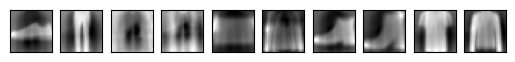

In [24]:

n_clusters = len(np.unique(kmean1.labels_))
fig, axes = plt.subplots(1, n_clusters)

for c_i in range(n_clusters):

    # get center for cluster c_i and reshape it for plotting
    image = kmean1.cluster_centers_[c_i].reshape(28,28)

    # plot the cluster centers
    axes[c_i].imshow(image,
              cmap='grey')

    # Styling: Turn off x/y ticks
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])

## c)​ Visualize 10 images corresponding to each cluster

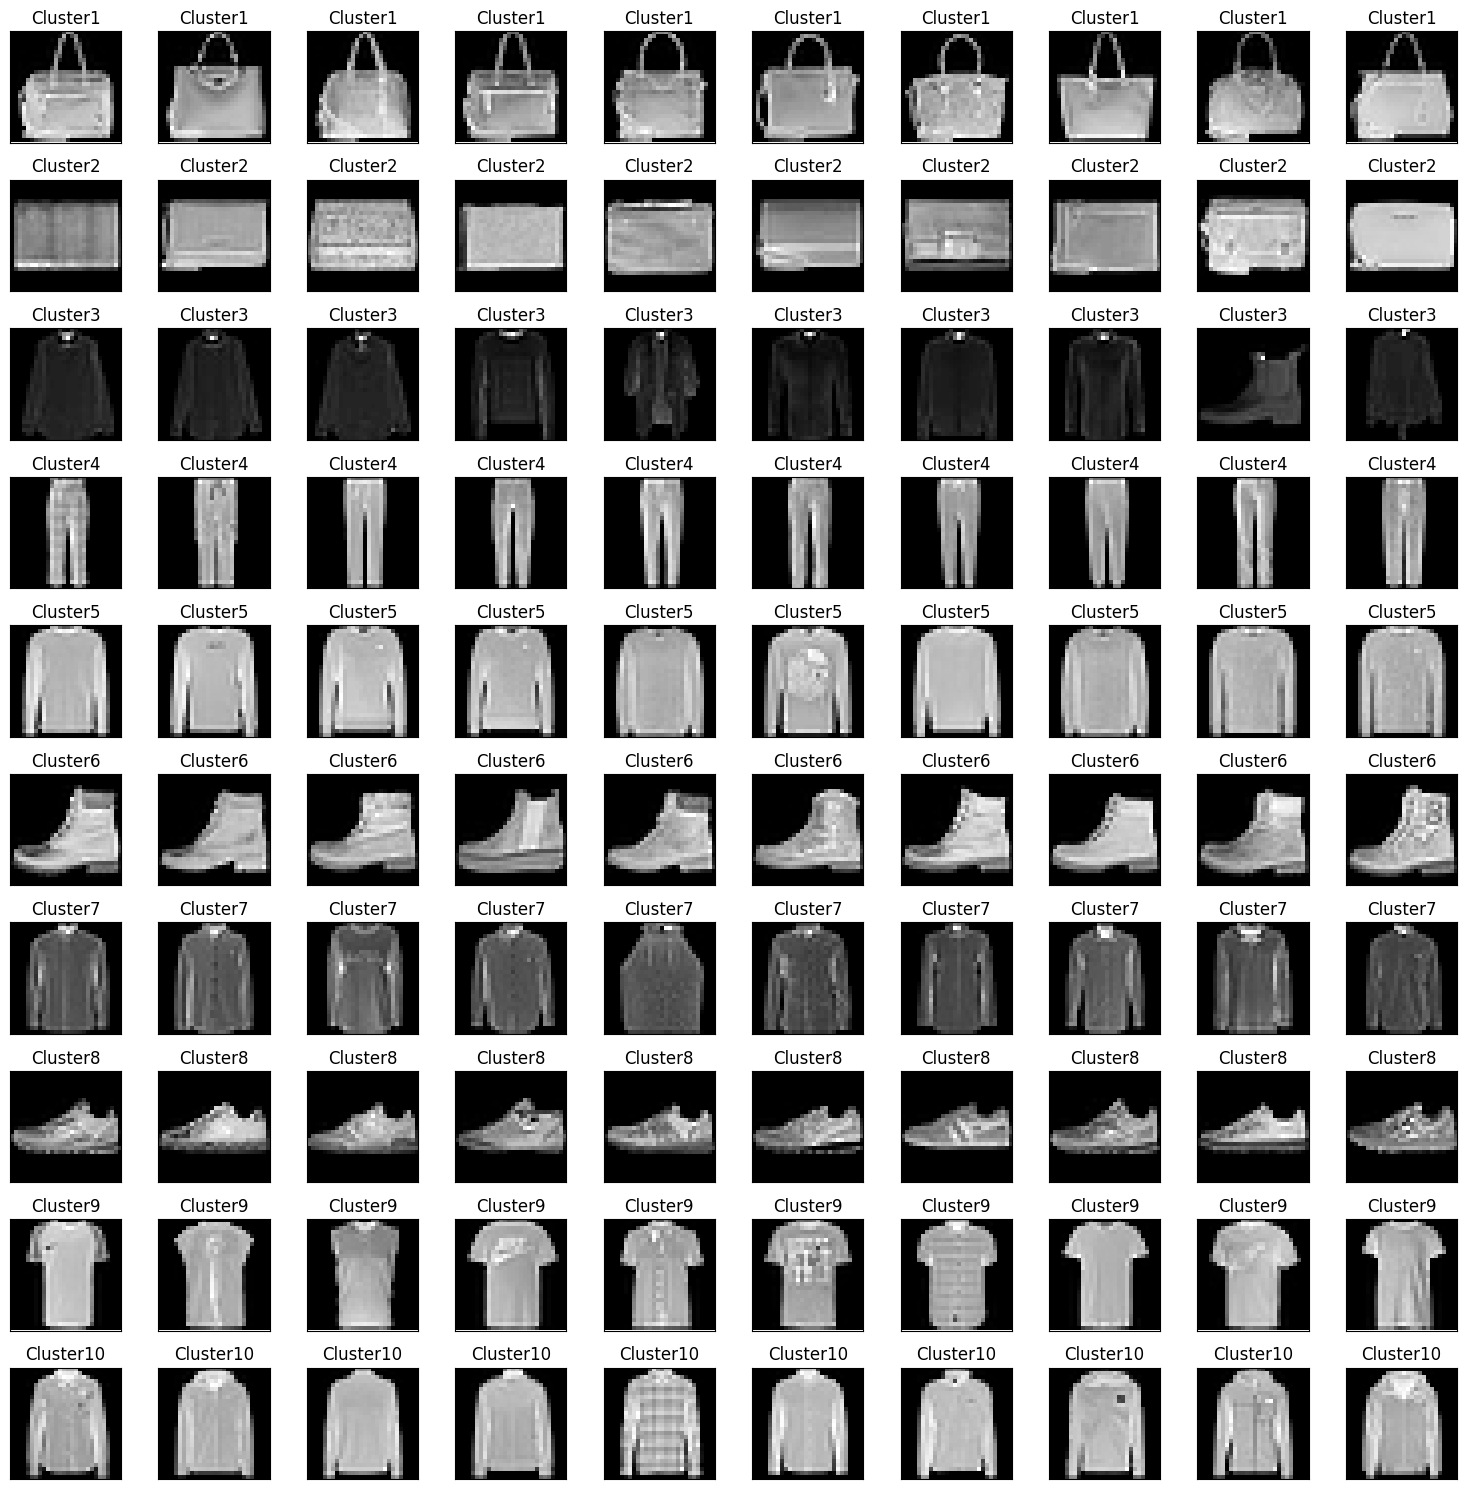

In [ ]:
from sklearn.metrics import pairwise_distances


# The distance from each cluster center to all points in X_total Scaled
dist_matrix= pairwise_distances(kmean1.cluster_centers_,X_total_scaled)

#get indices of top 10 closest instances for each center
top_10_indices=np.argsort(dist_matrix,axis=1)[:,:10]

#Deine the number of cluster and images to display
n_clusters=len(kmean1.cluster_centers_)

# to plot 10 images per cluster
fig,axes=plt.subplots(n_clusters,10,figsize=(15,n_clusters*1.5))
# fig, axes = pl_traint.subplots(n_clusters, 10, figsize=(15, n_clusters * 1.5))

for ci in range(n_clusters):
    for img in range(10):

        #get the image corresponding to the 10 closest indices
        image=X.loc[top_10_indices[ci,img]].values.reshape(28,28)

        #Plot the image in corresponding subplot
        ax=axes[ci,img] if n_clusters >1 else axes[img]
        ax.imshow(image,cmap='gray')  #Adjusst cmap based on image format (e.g., 'gray' for grayscale)

        #Remove ticks and labels

        ax.set_xticks([])
        ax.set_yticks([])

        #Optionally add a title to each image 
        ax.set_title(f'Cluster{ci+1}')

plt.tight_layout()
plt.show()







## d)​ Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.

In [44]:

# Select one image from each class as initialization (10 total)
initial_centroids = []
for class_id in range(10):
    # Get the first image of this class
    idx = np.where(y== class_id)[0][0] 
    initial_centroids.append(X.loc[idx])
initial_centroids = np.array(initial_centroids)

# Train KMeans with chosen centroids
kmeans = KMeans(n_clusters=10, init=initial_centroids, n_init=1, max_iter=300, random_state=42)
kmeans.fit(X)

KMeans(init=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
       n_clusters=10, n_init=1, random_state=42)

In [45]:
kmeans.labels_
centers=kmeans.cluster_centers_

### Number of points in each cluster

In [46]:
from collections import Counter
cluster_counts=np.bincount(kmeans.labels_)

for i, count in enumerate(cluster_counts):
    print(f'Cluster {i}: {count}')

Cluster 0: 4478
Cluster 1: 9166
Cluster 2: 7582
Cluster 3: 6002
Cluster 4: 9632
Cluster 5: 8981
Cluster 6: 11032
Cluster 7: 5100
Cluster 8: 4420
Cluster 9: 3554


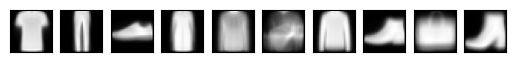

In [48]:
## Visualizing images from eacch cluster centers.
n_clusters = len(np.unique(kmeans.labels_))
fig, axes = plt.subplots(1, n_clusters)

for c_i in range(n_clusters):

    # get center for cluster c_i and reshape it for plotting
    image = kmeans.cluster_centers_[c_i].reshape(28,28)

    # plot the cluster centers
    axes[c_i].imshow(image,
              cmap='grey')

    # Styling: Turn off x/y ticks
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])

## e)​ Visualize 10 images corresponding to each cluster.

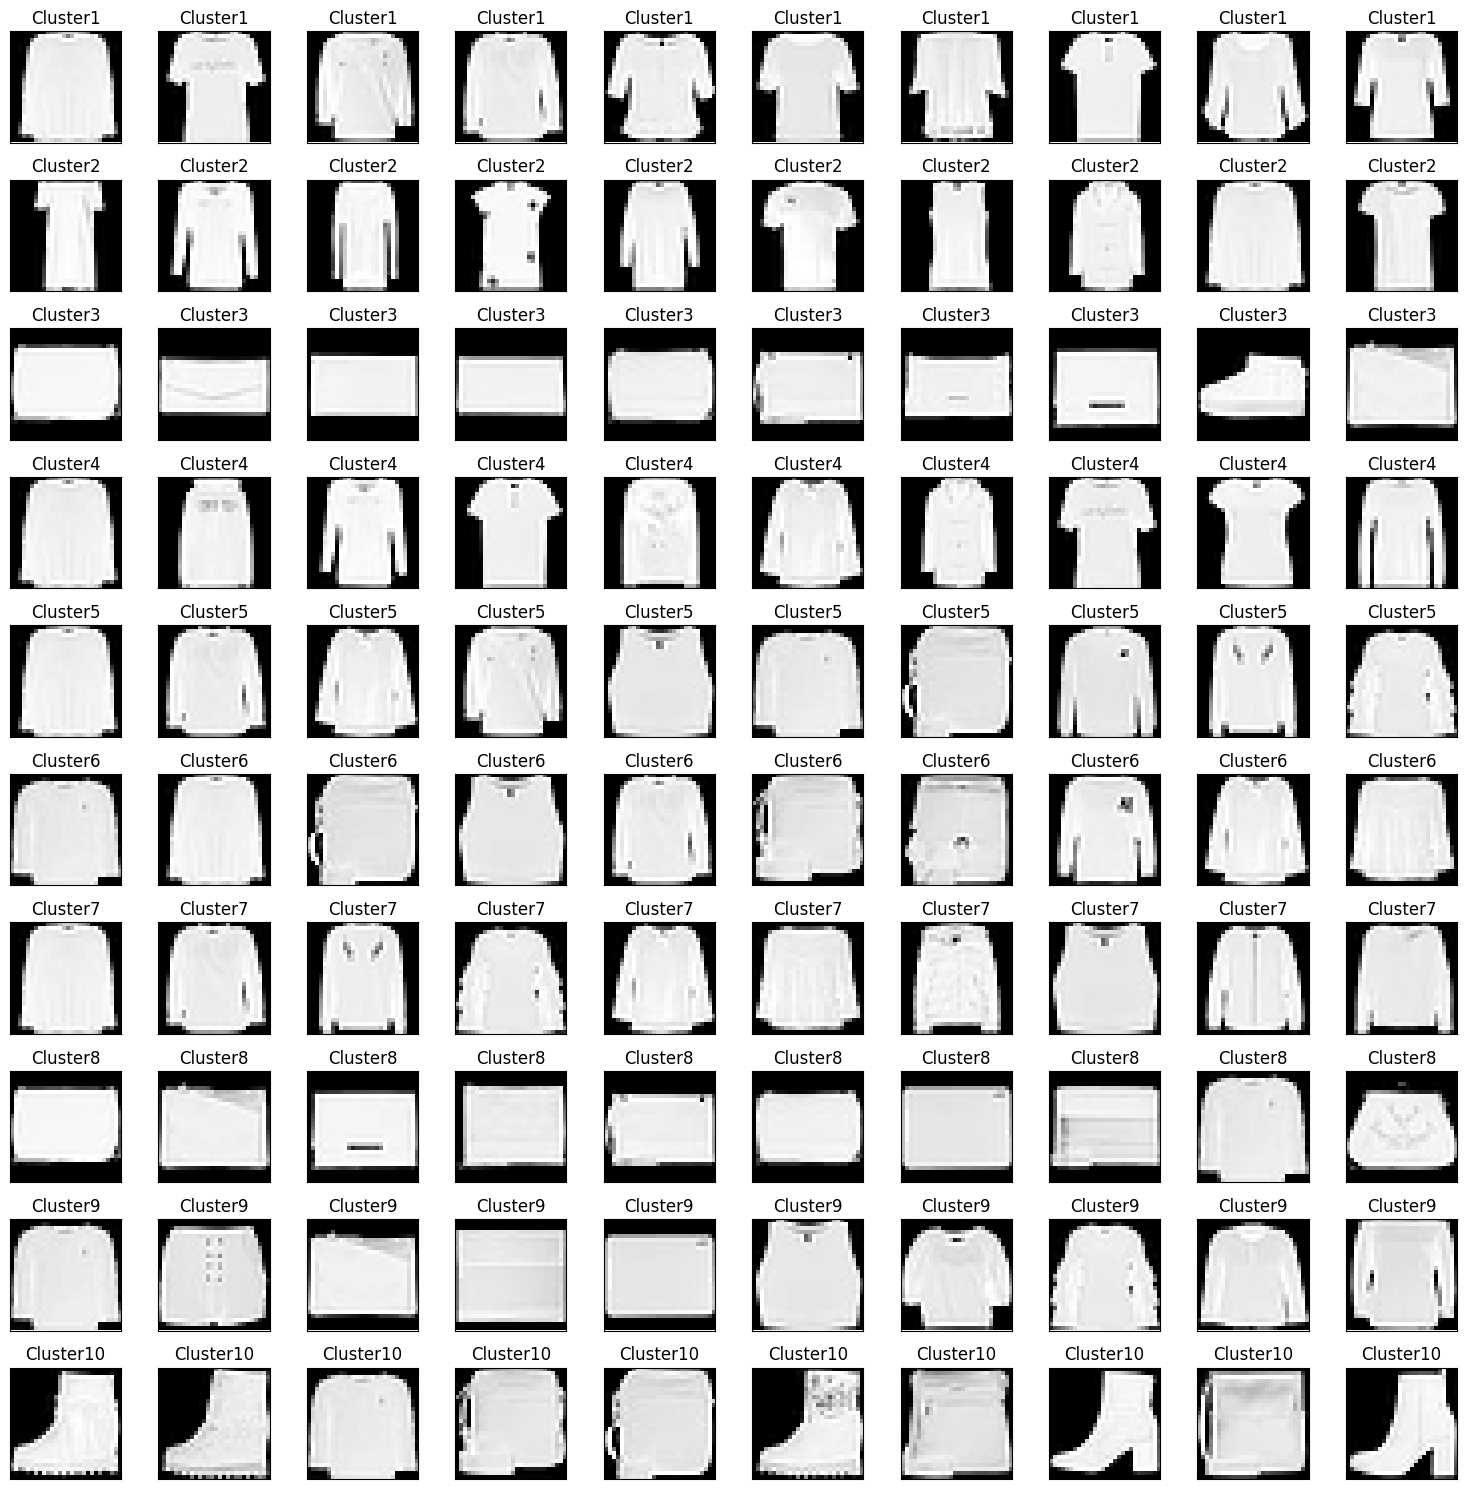

In [49]:
from sklearn.metrics import pairwise_distances


# The distance from each cluster center to all points in X_total Scaled
dist_matrix= pairwise_distances(kmeans.cluster_centers_,X_total_scaled)

#get indices of top 10 closest instances for each center
top_10_indices=np.argsort(dist_matrix,axis=1)[:,:10]

#Deine the number of cluster and images to display
n_clusters=len(kmeans.cluster_centers_)

# to plot 10 images per cluster
fig,axes=plt.subplots(n_clusters,10,figsize=(15,n_clusters*1.5))
# fig, axes = plt.subplots(n_clusters, 10, figsize=(15, n_clusters * 1.5))

for ci in range(n_clusters):
    for img in range(10):

        #get the image corresponding to the 10 closest indices
        image=X.loc[top_10_indices[ci,img]].values.reshape(28,28)

        #Plot the image in corresponding subplot
        ax=axes[ci,img] if n_clusters >1 else axes[img]
        ax.imshow(image,cmap='gray')  #Adjusst cmap based on image format (e.g., 'gray' for grayscale)

        #Remove ticks and labels

        ax.set_xticks([])
        ax.set_yticks([])

        #Optionally add a title to each image 
        ax.set_title(f'Cluster{ci+1}')

plt.tight_layout()
plt.show()

## f)​ Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering.

In [50]:
# Get SSE (sum of squared error)
sse = kmean1.inertia_

In [51]:
sse

30518635.02689226

In [53]:
# Get SSE (sum of squared error)
sse = kmeans.inertia_

In [54]:
sse

145812853784.8872

# Q3: Implementation of Neural Networks from Scratch Using NumPy and Comparison with Sklearn (20 marks)

## a)​ Load and preprocess the MNIST Digits Dataset. (3 marks)

In [138]:
import  numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [140]:
#step 1 Load the dataset
digits=load_digits()

X,y = digits.data,digits.target

#Step2 Normalise pixel values (optional)

#Each pixels is in range 0-16, so we can scale to [0,1]

X=X/16.0


#Step3 One-hot encode the labels (optional)
encoder=OneHotEncoder(sparse_output=False)
y_ecoded=encoder.fit_transform(y.reshape(-1,1))

#step4 train test split
X_train,X_test,y_train,y_test=train_test_split(X,y_ecoded,test_size=0.2,random_state=42)

#shapes
print('X_train_shape:',X_train.shape)
print('X_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)





X_train_shape: (1437, 64)
X_test_shape: (360, 64)
y_train_shape: (1437, 10)
y_test_shape: (360, 10)


## b)​ Implement a neural network with one input layer, one hidden layer, and one output layer using NumPy. (5 marks)

## c)​ Train the neural network with various hyperparameters (e.g., learning rate, number of hidden nodes). (3 marks)

In [166]:
train_losses=[]
train_accuracies=[]

#Neural network parameters

imput_size=64
hidden_size=32
output_size=10
learning_rate=0.1
epochs=1000


#initialise weights and biases
np.random.seed(42)
w1=np.random.randn(imput_size,hidden_size)*0.01
b1=np.zeros((1,hidden_size))

w2=np.random.randn(hidden_size,output_size)*0.01
b2=np.zeros((1,output_size))


#Activation functions
def relu(Z):
    return np.maximum(0,Z)

def relu_derivative(Z):
    return (Z>0).astype(float)

def softmax(Z):
    expz=np.exp(Z-np.max(Z,axis=1,keepdims=True))
    return expz/np.sum(expz,axis=1,keepdims=True)


#Loss Function (cross- entropy)

def compute_loss(y_true, y_pred):
    m=y_true.shape[0]
    log_probs=-np.log(y_pred+1e-9)
    loss= np.sum(y_true*log_probs)/m
    return loss

## training 

for epoch in range(epochs):
    #Forward pass
    Z1=np.dot(X_train,w1)+b1
    A1=relu(Z1)
    Z2=np.dot(A1,w2)+b2
    A2=softmax(Z2)


    #Loss
    loss=compute_loss(y_train,A2)

    #Backpropagation
    m=y_train.shape[0]
    dZ2=A2-y_train
    dW2 = np.dot(A1.T,dZ2)/m
    db2 =np.sum(dZ2,axis=0,keepdims=True)/m

    dA1=np.dot(dZ2,w2.T)
    dZ1=dA1*relu_derivative(Z1)

    dW1=np.dot(X_train.T,dZ1)/m
    db1=np.sum(dZ1,axis=0,keepdims=True)/m


    #Calculate accuracy
    preds = np.argmax(A2,axis=1)
    true=np.argmax(y_train,axis=1)
    acc=np.mean(preds==true)

    #Save metrics
    train_losses.append(loss)
    train_accuracies.append(acc)


    #update weights
    w1-=learning_rate*dW1
    b1-=learning_rate*db1
    w2-=learning_rate*dW2
    b2-=learning_rate*db2
    

    #print loss every 100 epochs
    if epoch%100 ==0:
        print(f'Epoch {epoch}, Loss :{loss}')





Epoch 0, Loss :2.3025671051625456
Epoch 100, Loss :2.2468767129731955
Epoch 200, Loss :1.4837250547339254
Epoch 300, Loss :0.7199305974994955
Epoch 400, Loss :0.44135243895784054
Epoch 500, Loss :0.3185596350689123
Epoch 600, Loss :0.2514835033373065
Epoch 700, Loss :0.20964360413509472
Epoch 800, Loss :0.1807513974582139
Epoch 900, Loss :0.15937495519908418


## d)​ Evaluate the performance of the neural network on the testing set. (2 marks)

In [ ]:
Z1_test=np.dot(X_test,w1)+b1
A1_test=relu(Z1_test)
Z2_test=np.dot(A1_test,w2)+b2
A2_test=softmax(Z2_test)

predictions= np.argmax(A2_test,axis=1)
true_labels=np.argmax(y_test,axis=1)

numpy_accuracy=np.mean(predictions==true_labels)

print(f'Test accuracy using numpy : {numpy_accuracy}')

Test accuracy : 0.9472222222222222


## Implement the same neural network using sklearn and compare the results with the NumPy implementation. (4 marks)

In [162]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time


#Using original lable instead of onehot encoded
y_train_cls=np.argmax(y_train,axis=1)
y_test_cls=np.argmax(y_test, axis=1)

#train MLP classifier
start_time= time.time()
mlp= MLPClassifier(hidden_layer_sizes=(32,),activation='relu',solver='adam',max_iter=1000,random_state=42)
mlp.fit(X_train,y_train_cls)
end_time=time.time()



traindata

In [163]:
#predict and evaluate
y_pred=mlp.predict(X_test)
accuracy_sklarn=accuracy_score(y_test_cls,y_pred)

print(f'Sklearn MLP accuracy {accuracy_sklarn}')
print(f'The training time is {end_time-start_time:.2f}')



Sklearn MLP accuracy 0.9722222222222222
The training time is 1.97


In [165]:
print(f'Sklearn MLP accuracy {accuracy_sklarn}')

print(f'Test accuracy using numpy : {numpy_accuracy}')



Sklearn MLP accuracy 0.9722222222222222
Test accuracy using numpy : 0.9472222222222222


## Plot the training and validation loss/accuracy curves (for both experiments). (3 marks)

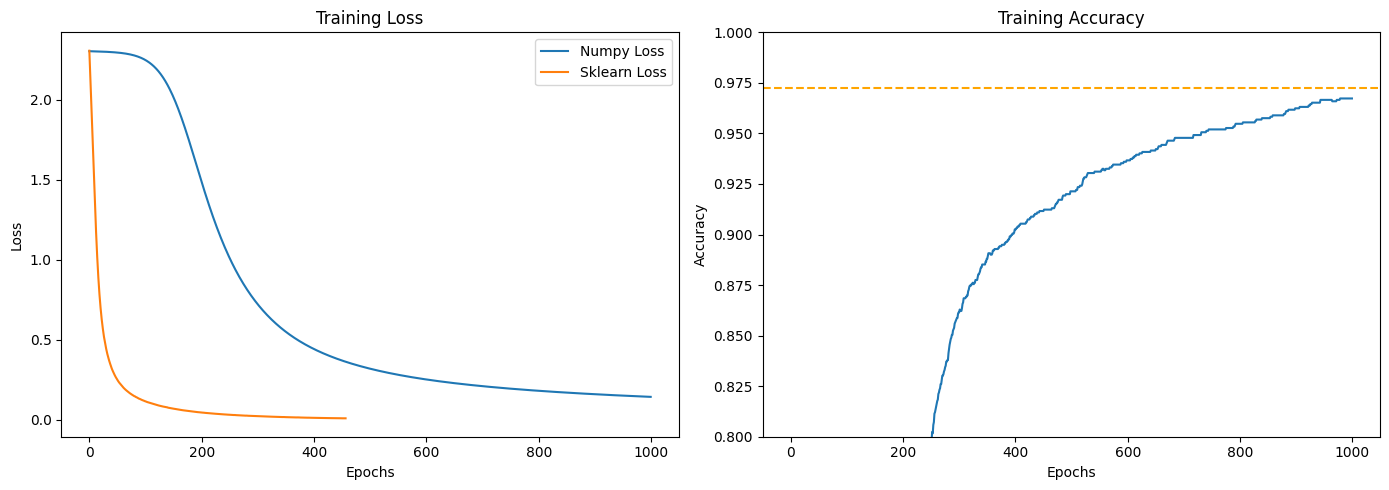

In [172]:
plt.figure(figsize=(14,5))

#loss
plt.subplot(1,2,1)
plt.plot(train_losses,label='Numpy Loss')
plt.plot(mlp.loss_curve_,label='Sklearn Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(1,2,2)
plt.plot(train_accuracies,label='Numpy Accuracy')
plt.axhline(y=accuracy_score(y_test_cls,y_pred),color='orange',linestyle='--',label='Sklearn Final Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8,1.0)
plt.legend

plt.tight_layout()
plt.show()